In [2]:
# importing necessary packages
import numpy as np
import pandas as pd

# import sys
# !{sys.executable} -m pip install geopandas
# !{sys.executable} -m pip install geopandas
#!pip install geopandas
import geopandas as gpd

# Install a pip package in the current Jupyter kernel
#!pip install folium
import folium 
from folium import Circle
from folium.plugins import BeautifyIcon
from folium import plugins
import branca.colormap as cm

import json
import requests
import os
import sys

In [3]:
# Flight Frequency Data shows departure for each month from Jan-Nov 2020 in every country
flights = pd.read_excel("Flight_Frequency_ALL_DATA.xlsx", skiprows=[0,1,2,3,4,5])

flights_percent_change = flights[0:16]
flights_2020 = flights[19:36]
flights_2019 = flights[39:]

flights_2020 

,Unnamed: 0,Countries,January,February,March,April,May,June,July,August,September,October,2020-11-02 00:00:00,2020-11-09 00:00:00,2020-11-16 00:00:00,2020-11-23 00:00:00
19,NaN,Countries,January,February,March,April,May,June,July,August,September,October,2020-11-02 00:00:00,2020-11-09 00:00:00,2020-11-16 00:00:00,2020-11-23 00:00:00
20,Grand Total,ALL,2864719,2640268,2463598,1007822,924896,1112686,1457853,1638684,1616323,2000221,390763,384802,386273,387116
21,Spain,Spain,56143,59917,48632,4540,5108,8281,30101,45825,39337,33872,5648,4713,4297,4172
22,Hong Kong (sar) China,Hong Kong,13201,7842,3282,975,1417,1480,1326,1294,1445,1958,392,420,432,424
23,Germany,Germany,60919,64563,48618,5337,6707,10446,22212,28334,29304,31848,4705,3550,3052,2899
24,Singapore,Singapore,14780,12604,8191,912,491,679,892,1069,873,1291,289,286,290,285
25,Italy,Italy,42707,43710,23856,7951,9507,7439,21474,30427,27897,26584,4543,3358,2593,2011
26,France,France,47305,49333,43205,5441,4828,7904,21929,29695,30414,29728,4913,2940,2647,2585
27,United kingdom,UK,67478,72973,59270,6398,5875,9196,18758,31507,33214,34172,5116,3282,2353,2216
28,Australia,Australia,53018,54404,52312,8455,7624,9385,13316,13856,14672,20603,4374,4551,4744,5123


In [4]:
# importing weekly flight frequency dataset for each country from Jan-Nov 2020

flight_weekly = pd.read_csv("weekly_flight_frequency2.csv", skiprows=[0,1,2,3,4])
flight_weekly.columns = flight_weekly.columns.str.strip()
#flight_weekly.dropna(subset=['Year'])
#flight_weekly.columns["WEEK", "Year"]

# adding in Country values so it's easier to group by both years
for i in range(4,84,5):
    flight_weekly.iloc[i + 1,0] = flight_weekly.iloc[i,0]

# group by Year and Week to produce two rows of 2019 and 2020 data with all countries for each
flight_weekly_grouped = flight_weekly.groupby(['Year', 'WEEK']).sum()
#flight_weekly_grouped.columns = ["6-Jan", "13-Jan", ""]
#df2 = flight_weekly.loc[flight_weekly['Year'] == 2020]

# reset index & rename columns
flight_weekly_grouped = flight_weekly_grouped.reset_index()
flight_grouped = flight_weekly_grouped.rename(columns={"WEEK": "Countries"})

# remove commas in all the columns
flight_grouped = flight_grouped.replace(',','', regex=True)

# make all columns numeric
x = flight_grouped.iloc[:,2:49] 
#flight_grouped.iloc[:,2:40].apply(pd.to_numeric)
#flight_grouped.astype(int)
x.astype(int)

#df1 = flight_grouped.iloc[:, 0:12]
#df1

#df1.columns = ['Year', 'Countries', 'January', 'Febuary', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October']
#df1

flight_grouped = flight_grouped.drop([0])

# preprocessed grouped dataset with weekly flight frequencies for all countries 
# for the years 2019 & 2020 from Jan - Nov
flight_grouped
#df1.to_csv('/Users/devanshi/Downloads/flights/flights_2020.csv', index=False, header=True)  
#print(df1)

,Year,Countries,1,2,3,4,5,6,7,8,...,38,39,40,41,42,43,44,45,46,47
1,2019.0,Australia,13343,13551,13506,13716,13874,13932,13965,14035,...,14920,14680,14425,14219,14090,14165,13929,14113,14124,14141
2,2019.0,China,89428,91393,95342,97723,92700,98024,96217,93891,...,95294,95302,94263,93923,92670,92206,91891,91990,91505,91247
3,2019.0,France,11948,11847,11899,11995,12112,12356,12326,12368,...,15173,14696,14459,14505,14293,13033,12638,12188,12116,12033
4,2019.0,Germany,16595,16561,16609,16803,17006,17421,17403,17414,...,20852,20603,20573,20439,19974,17295,16899,16634,16539,16413
5,2019.0,Hong Kong,3635,3642,3677,3722,3719,3727,3672,3662,...,3462,3556,3485,3374,3325,3335,3204,3200,3167,3157
6,2019.0,India,25013,24949,24655,25182,24845,24100,23353,24250,...,24297,24800,24951,25076,25134,25396,25606,25565,25692,25669
7,2019.0,Italy,11229,10958,10923,10997,11128,11387,11551,11504,...,15073,14323,13694,13783,13481,12095,11623,11375,11342,11282
8,2019.0,Japan,21547,21602,21692,21763,21895,21786,21710,21850,...,22321,22143,22111,22079,21960,22032,22210,22240,21929,21958
9,2019.0,Singapore,3677,3655,3682,3754,3809,3747,3719,3697,...,3513,3515,3504,3503,3502,3540,3526,3559,3575,3596
10,2019.0,South Korea,8435,8400,8438,8471,8532,8427,8452,8445,...,8517,8552,8530,8508,8419,8108,8177,8227,8294,8321


In [4]:
# Dataset for COVID-9 cases by country increasing day by day
covid_country = pd.read_csv("country_wise_latest.csv")
covid_day = pd.read_csv("covid_19_clean_complete-20201129-012740.csv")
covid_grouped = pd.read_csv("full_grouped.csv")

# grouped by Country & Date and summed values
covid_dates = covid_grouped.groupby(['Country/Region', 'Date']).sum()
# reset index for future use
covid_dates = covid_dates.reset_index()

# renaming column for easier access
covid_dates = covid_dates.rename(columns={"Country/Region": "Country"}) 

# preprocessed dataset with daily Covid-19 grouped by country from Jan - Nov
covid_dates

,Country,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,Afghanistan,2020-01-22,0,0,0,0,0,0,0
1,Afghanistan,2020-01-23,0,0,0,0,0,0,0
2,Afghanistan,2020-01-24,0,0,0,0,0,0,0
3,Afghanistan,2020-01-25,0,0,0,0,0,0,0
4,Afghanistan,2020-01-26,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
35151,Zimbabwe,2020-07-23,2124,28,510,1586,90,2,0
35152,Zimbabwe,2020-07-24,2296,32,514,1750,172,4,4
35153,Zimbabwe,2020-07-25,2434,34,518,1882,138,2,4
35154,Zimbabwe,2020-07-26,2512,34,518,1960,78,0,0


In [5]:
# reading file with country codes for each country
# taking Country Codes for each country and creating a data frame
country_codes = pd.read_csv("country_codes_3_digit.csv", skiprows = [0,1])
country_codes.columns = ["CountryCode", "Country"]
country_codes = country_codes.reindex(columns=["Country", "CountryCode"])

# final dataset with Country names and CountryCodes for future use
country_codes

,Country,CountryCode
0,Afghanistan,AFG
1,Aland Islands,ALA
2,Albania,ALB
3,Algeria,DZA
4,American Samoa,ASM
...,...,...
246,Wallis and Futuna,WLF
247,Western Sahara,ESH
248,Yemen,YEM
249,Zambia,ZMB


In [6]:
# merging the Country Codes dataset with the Covid-19 dataset for Folium vizualization purpose
covid_merge = pd.merge(covid_dates, country_codes, on='Country')

# group by CountryCode and Date and take sums
covid_merge_grouped = covid_merge.groupby(["CountryCode", "Date"]).sum()
# reset index
covid_merge_grouped = covid_merge_grouped.reset_index()

# final daily Covid-19 cases dataset grouped by Country Codes and Dates
covid_merge_grouped


,CountryCode,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,AFG,2020-01-22,0,0,0,0,0,0,0
1,AFG,2020-01-23,0,0,0,0,0,0,0
2,AFG,2020-01-24,0,0,0,0,0,0,0
3,AFG,2020-01-25,0,0,0,0,0,0,0
4,AFG,2020-01-26,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
30827,ZWE,2020-07-23,2124,28,510,1586,90,2,0
30828,ZWE,2020-07-24,2296,32,514,1750,172,4,4
30829,ZWE,2020-07-25,2434,34,518,1882,138,2,4
30830,ZWE,2020-07-26,2512,34,518,1960,78,0,0


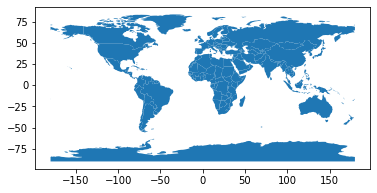

In [7]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

# Examine country GeoDataFrame
world.head()
world.plot()

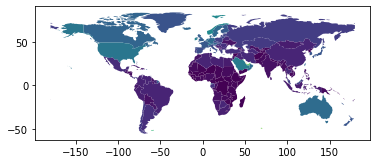

In [8]:
# Plot by GDP per capta
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

world['gdp_per_cap'] = world.gdp_md_est / world.pop_est

world.plot(column='gdp_per_cap');

In [9]:
world_map = 'world-countries-map.json'
#m4 = folium.Map(location=[0, 0], zoom_start=1.5, max_bounds=True)
m5 = folium.Map(min_zoom=1.5, max_bounds=True, tiles='cartodbpositron')
m5.save(outfile='fix_boundary.html')
m5

In [10]:
geometries = gpd.read_file("world-countries-map-polygon.shp")

geometries.columns = ["CountryCode", "Country", "geometry"]

final_covid_merged = geometries.merge(covid_merge_grouped, on="CountryCode")

geometries

,CountryCode,Country,geometry
0,AFG,Afghanistan,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,AGO,Angola,"MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6..."
2,ALB,Albania,"POLYGON ((20.59025 41.85540, 20.46317 41.51509..."
3,ARE,United Arab Emirates,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
4,ARG,Argentina,"MULTIPOLYGON (((-65.50000 -55.20000, -66.45000..."
...,...,...,...
172,PSE,West Bank,"POLYGON ((35.54566 32.39399, 35.54525 31.78251..."
173,YEM,Yemen,"POLYGON ((53.10857 16.65105, 52.38521 16.38241..."
174,ZAF,South Africa,"POLYGON ((31.52100 -29.25739, 31.32556 -29.401..."
175,ZMB,Zambia,"POLYGON ((32.75937 -9.23060, 33.23139 -9.67672..."


In [11]:
#log
final_covid_merged = final_covid_merged[final_covid_merged.Confirmed != 0]

final_covid_merged['log_Confirmed'] = np.log10(final_covid_merged['Confirmed'])
final_covid_merged


,CountryCode,Country,geometry,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,log_Confirmed
33,AFG,Afghanistan,"POLYGON ((61.21082 35.65007, 62.23065 35.27066...",2020-02-24,1,0,0,1,1,0,0,0.000000
34,AFG,Afghanistan,"POLYGON ((61.21082 35.65007, 62.23065 35.27066...",2020-02-25,1,0,0,1,0,0,0,0.000000
35,AFG,Afghanistan,"POLYGON ((61.21082 35.65007, 62.23065 35.27066...",2020-02-26,1,0,0,1,0,0,0,0.000000
36,AFG,Afghanistan,"POLYGON ((61.21082 35.65007, 62.23065 35.27066...",2020-02-27,1,0,0,1,0,0,0,0.000000
37,AFG,Afghanistan,"POLYGON ((61.21082 35.65007, 62.23065 35.27066...",2020-02-28,1,0,0,1,0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
27067,ZWE,Zimbabwe,"POLYGON ((31.19141 -22.25151, 30.65986 -22.151...",2020-07-23,2124,28,510,1586,90,2,0,3.327155
27068,ZWE,Zimbabwe,"POLYGON ((31.19141 -22.25151, 30.65986 -22.151...",2020-07-24,2296,32,514,1750,172,4,4,3.360972
27069,ZWE,Zimbabwe,"POLYGON ((31.19141 -22.25151, 30.65986 -22.151...",2020-07-25,2434,34,518,1882,138,2,4,3.386321
27070,ZWE,Zimbabwe,"POLYGON ((31.19141 -22.25151, 30.65986 -22.151...",2020-07-26,2512,34,518,1960,78,0,0,3.400020


In [12]:
'''
styledict = {
    : {
        : {'color': , 'opacity': }
        : {'color': , 'opacity': }
        ...
        },
    ...,
    : {
        : {'color': , 'opacity': }
        : {'color': , 'opacity': }
        ...
        }
}
'''

final_covid_merged['Date_sec'] = pd.to_datetime(final_covid_merged['Date']).astype(int) / 10**9
final_covid_merged['Date_sec'] = final_covid_merged['Date_sec'].astype(int).astype(str)

#covid_merge_grouped['log_Confirmed'] = np.log10(covid_merge_grouped['Confirmed'])

max_color = max(final_covid_merged['log_Confirmed'])
min_color = min(final_covid_merged['log_Confirmed'])
cmap = cm.linear.YlOrRd_09.scale(min_color, max_color)
final_covid_merged['Color'] = final_covid_merged['log_Confirmed'].map(cmap)



In [13]:
country_list = final_covid_merged['CountryCode'].unique().tolist()
country_idx = range(len(country_list))

style_dict = {}
for i in country_idx:
    country = country_list[i]
    result = final_covid_merged[final_covid_merged['CountryCode'] == country]
    inner_dict = {}
    for _, r in result.iterrows():
        inner_dict[r['Date_sec']] = {'color': r['Color'], 'opacity': 0.7}
    style_dict[str(i)] = inner_dict
    

In [14]:
countries_df = geometries[["geometry"]]
countries_gdf = gpd.GeoDataFrame(countries_df)
#countries_gdf = countries_gdf.drop("index", axis=1)
#countries_gdf = countries_gdf.reset_index()
#countries_gdf = countries_gdf.reset_index()
countries_gdf
#countries_gdf.to_file("output.json", driver="GeoJSON")

countries_gdf

,geometry
0,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,"MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6..."
2,"POLYGON ((20.59025 41.85540, 20.46317 41.51509..."
3,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
4,"MULTIPOLYGON (((-65.50000 -55.20000, -66.45000..."
...,...
172,"POLYGON ((35.54566 32.39399, 35.54525 31.78251..."
173,"POLYGON ((53.10857 16.65105, 52.38521 16.38241..."
174,"POLYGON ((31.52100 -29.25739, 31.32556 -29.401..."
175,"POLYGON ((32.75937 -9.23060, 33.23139 -9.67672..."


In [22]:
#folium saturation slider code #1
from folium.plugins import TimeSliderChoropleth

#sys.setrecursionlimit(1500)
m8 = folium.Map(min_zoom=1.5, max_bounds=True, tiles='cartodbpositron')
m8.save(outfile='fix_boundary.html')
#m5

_ = TimeSliderChoropleth(
    data=countries_gdf.to_json(),
    #columns="geometry",
    styledict=style_dict).add_to(m8)

_ = cmap.add_to(m8)

cmap.caption = "Number of Confirmed Covid-19 Cases"
m8.save(outfile='TimeSliderChoropleth.html')
m8


In [16]:
#circles
# Make a data frame with dots to show on the map
# UPDATED Lat/Long values!!

data = {"CountryCode": ["AUS", "CHN", "FRA", "DEU", "HKG", "IND", "ITA", "JPN", "SGP", "KOR", "ESP", "SWE", "ARE", 
        "GB1", "US1"],
        "Country": ["Australia", "China", "France", "Germany", "Hong Kong", "India", "Italy", "Japan", "Singapore", 
        "South Korea", "Spain", "Sweden", "UAE", "UK", "USA"],
        "Latitude": [134.491000082, 103.81907349, 2.76172944519, 10.385780508, 114.113804542, 79.6119761026,
        12.0700133907, 138.030895577, 103.81725592, 127.839160864, -3.64755047323, 16.7455804869, 54.3001671016, 
        -1.1743, -100.4616737],
        "Longitude": [-25.7328870417, 36.5617654559, 46.1734401107, 51.1069818075, 22.3193, 22.8857821183,
        42.796626414, 37.592301353, 1.35876087075, 40.3852398347, 40.2444869811, 62.7796651931, 23.9052818785, 
        52.35555, 40.6795472026]}
flight_locations = pd.DataFrame(data, columns=["CountryCode", "Country", "Latitude", "Longitude"])
flight_locations["Value"] = flight_grouped["1"]
#flight_locations.iloc[0][4] = 10000

#m2 = folium.Map(location=[0, 0], zoom_start=1.5)
flight_locations = flight_locations.drop([0])

locations = flight_locations[['Longitude', 'Latitude']]
locationlist = locations.values.tolist()


flight_locations
#flight_grouped
#locationlist

,CountryCode,Country,Latitude,Longitude,Value
1,CHN,China,103.819073,36.561765,13343
2,FRA,France,2.761729,46.173440,89428
3,DEU,Germany,10.385781,51.106982,11948
4,HKG,Hong Kong,114.113805,22.319300,16595
5,IND,India,79.611976,22.885782,3635
6,ITA,Italy,12.070013,42.796626,25013
7,JPN,Japan,138.030896,37.592301,11229
8,SGP,Singapore,103.817256,1.358761,21547
9,KOR,South Korea,127.839161,40.385240,3677
10,ESP,Spain,-3.647550,40.244487,8435


In [17]:
#style dictionary for circles
'''
styledict = {
    : {
        : {'color': , 'opacity': }
        : {'color': , 'opacity': }
        ...
        },
    ...,
    : {
        : {'color': , 'opacity': }
        : {'color': , 'opacity': }
        ...
        }
}
'''

final_covid_merged['Date_sec'] = pd.to_datetime(final_covid_merged['Date']).astype(int) / 10**9
final_covid_merged['Date_sec'] = final_covid_merged['Date_sec'].astype(int).astype(str)

#covid_merge_grouped['log_Confirmed'] = np.log10(covid_merge_grouped['Confirmed'])

max_color = max(final_covid_merged['log_Confirmed'])
min_color = min(final_covid_merged['log_Confirmed'])
cmap = cm.linear.YlOrRd_09.scale(min_color, max_color)
final_covid_merged['Color'] = final_covid_merged['log_Confirmed'].map(cmap)


In [18]:
country_list = final_covid_merged['CountryCode'].unique().tolist()
country_idx = range(len(country_list))

style_dict = {}
for i in country_idx:
    country = country_list[i]
    result = final_covid_merged[final_covid_merged['CountryCode'] == country]
    inner_dict = {}
    for _, r in result.iterrows():
        inner_dict[r['Date_sec']] = {'color': r['Color'], 'opacity': 0.7}
    style_dict[str(i)] = inner_dict
    

In [19]:
countries_df = geometries[["geometry"]]
countries_gdf = gpd.GeoDataFrame(countries_df)
#countries_gdf = countries_gdf.drop("index", axis=1)
#countries_gdf = countries_gdf.reset_index()
#countries_gdf = countries_gdf.reset_index()
countries_gdf
#countries_gdf.to_file("output.json", driver="GeoJSON")

countries_gdf

,geometry
0,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,"MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6..."
2,"POLYGON ((20.59025 41.85540, 20.46317 41.51509..."
3,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
4,"MULTIPOLYGON (((-65.50000 -55.20000, -66.45000..."
...,...
172,"POLYGON ((35.54566 32.39399, 35.54525 31.78251..."
173,"POLYGON ((53.10857 16.65105, 52.38521 16.38241..."
174,"POLYGON ((31.52100 -29.25739, 31.32556 -29.401..."
175,"POLYGON ((32.75937 -9.23060, 33.23139 -9.67672..."


In [23]:
# I can add Circles one by one on the map
world_map = 'world-countries-map.json'
#m4 = folium.Map(location=[0, 0], zoom_start=1.5, max_bounds=True)
#m7 = folium.Map(location=[0, 0], zoom_start=1.5)
#m3.save(outfile='fix_boundary.html')
#m5

for point in range(0, len(locationlist)):
    folium.Circle(
        location = locationlist[point],
        key_on = 'feature.id',
        popup = flight_locations.iloc[point]["CountryCode"],
        #radius = flight_locations.iloc[point]["Value"],
        radius = 100000,
        color = "Crimson",
        fill = True,
        fill_color = "Crimson"
    ).add_to(m8)

m8.save('mymap.html')
m8